<b>Data Source:</b><br>
<b>IMDb Top 250 Movies, Ishtiaque Ahmed.</b><br>
<b>Retrieved fromhttps </b>www.kaggle.com/datasets/allubie/imdb-top-250-movies

# Importing Library

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv("imdb_top_250.csv")
data.head()

,Rank,Title,Year,Rating,Runtime
0,1,The Shawshank Redemption,1994,9.3,142
1,2,The Godfather,1972,9.2,175
2,3,The Dark Knight,2008,9.0,152
3,4,The Godfather Part II,1974,9.0,202
4,5,12 Angry Men,1957,9.0,96


## Selecting data

In [3]:
features = data[['Runtime', 'Year', 'Rating','Rank']]
labels = data['Title'].values

## Feature Scaling

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Dendrogram

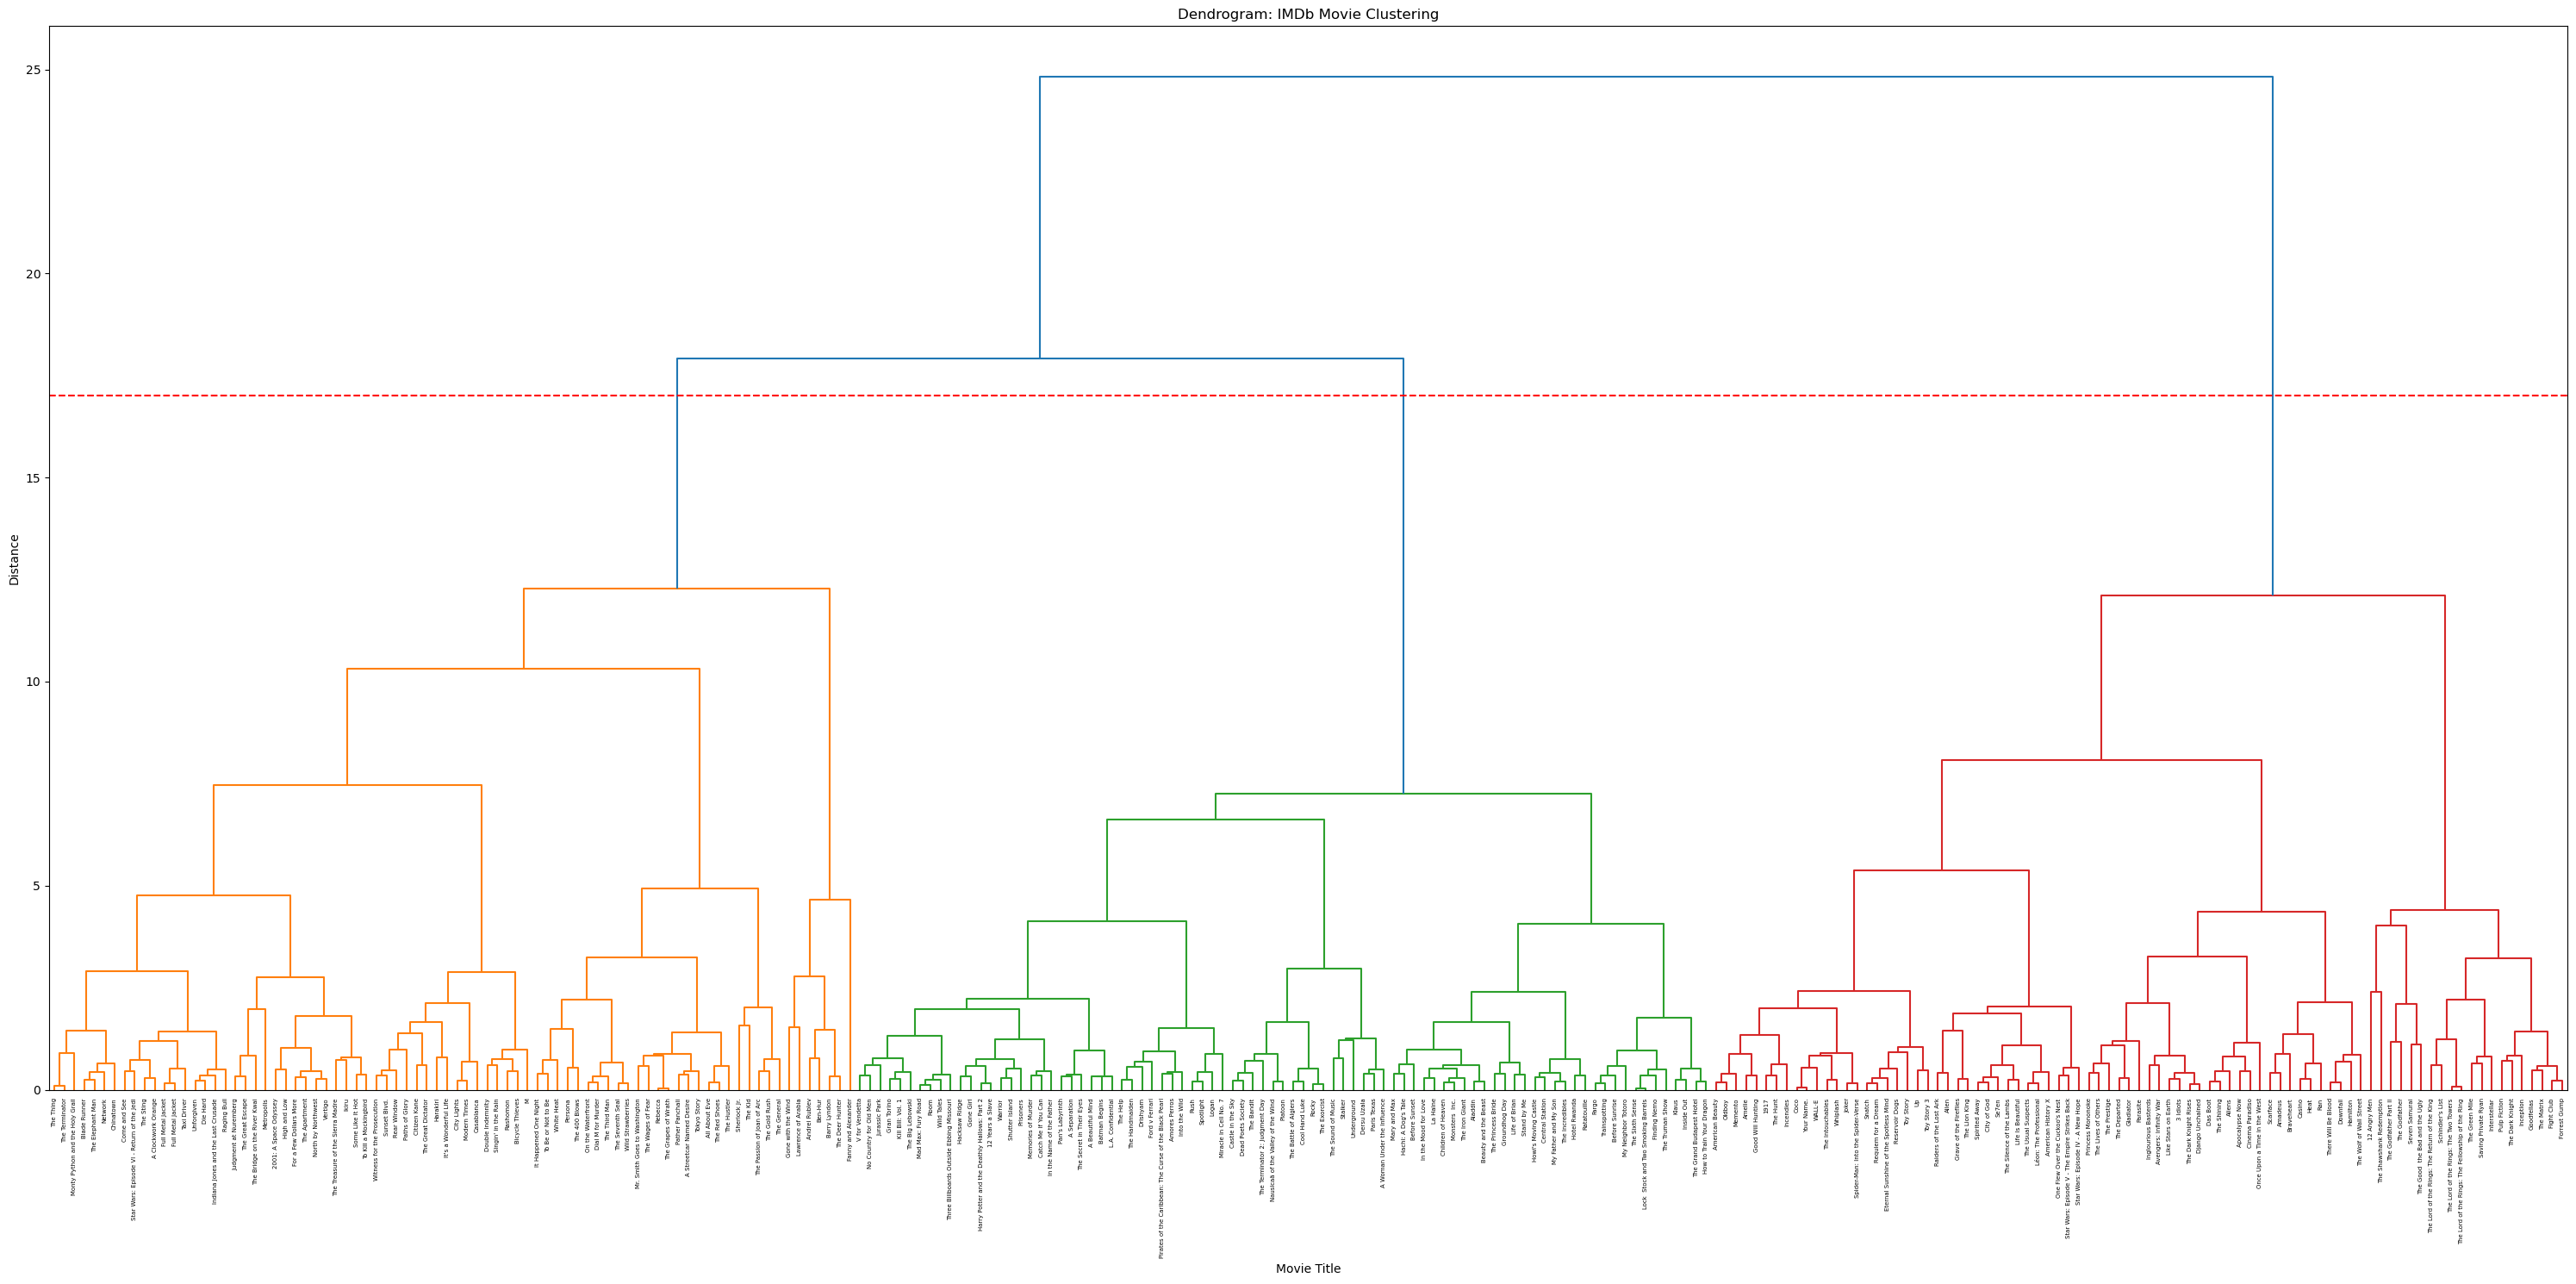

In [5]:
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(30, 15))
dendrogram(linked,
           labels=labels,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram: IMDb Movie Clustering')
plt.xlabel('Movie Title')
plt.ylabel('Distance')
plt.savefig("dendrogram.svg", format="svg")
plt.axhline(y=17, color='r', linestyle='--')
plt.tight_layout()
plt.show()

As we clustered the movie data based on similar features, the dendrogram helped visualize how closely related the movies are to one another. By analyzing the branching structure, we determined that the optimal number of clusters is 3, indicated by a distinct jump in linkage distance before the branches merge. This cut-off point groups movies that share more common characteristics—such as rating, runtime, or release period—into the same cluster. Each cluster potentially reflects a unique category of films, offering meaningful insights into how top-rated movies differ in style, tone, or audience appeal.